<a href="https://colab.research.google.com/github/nguyenquangdinh82/Dinh/blob/master/docs/docs/integrations/chat/google_generative_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGoogleGenerativeAI

This docs will help you get started with Google AI [chat models](/docs/concepts/chat_models). For detailed documentation of all ChatGoogleGenerativeAI features and configurations head to the [API reference](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html).

Google AI offers a number of different chat models. For information on the latest models, their features, context windows, etc. head to the [Google AI docs](https://ai.google.dev/gemini-api/docs/models/gemini).

:::info Google AI vs Google Cloud Vertex AI

Google's Gemini models are accessible through Google AI and through Google Cloud Vertex AI. Using Google AI just requires a Google account and an API key. Using Google Cloud Vertex AI requires a Google Cloud account (with term agreements and billing) but offers enterprise features like customer encription key, virtual private cloud, and more.

To learn more about the key features of the two APIs see the [Google docs](https://cloud.google.com/vertex-ai/generative-ai/docs/migrate/migrate-google-ai#google-ai).

:::

## Overview
### Integration details

| Class | Package | Local | Serializable | [JS support](https://js.langchain.com/docs/integrations/chat/google_generativeai) | Package downloads | Package latest |
| :--- | :--- | :---: | :---: |  :---: | :---: | :---: |
| [ChatGoogleGenerativeAI](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) | [langchain-google-genai](https://python.langchain.com/api_reference/google_genai/index.html) | ❌ | beta | ✅ | ![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-google-genai?style=flat-square&label=%20) | ![PyPI - Version](https://img.shields.io/pypi/v/langchain-google-genai?style=flat-square&label=%20) |

### Model features
| [Tool calling](/docs/how_to/tool_calling) | [Structured output](/docs/how_to/structured_output/) | JSON mode | [Image input](/docs/how_to/multimodal_inputs/) | Audio input | Video input | [Token-level streaming](/docs/how_to/chat_streaming/) | Native async | [Token usage](/docs/how_to/chat_token_usage_tracking/) | [Logprobs](/docs/how_to/logprobs/) |
| :---: | :---: | :---: | :---: |  :---: | :---: | :---: | :---: | :---: | :---: |
| ✅ | ✅ | ❌ | ✅ | ✅ | ✅ | ✅ | ✅ | ✅ | ❌ |

## Setup

To access Google AI models you'll need to create a Google Acount account, get a Google AI API key, and install the `langchain-google-genai` integration package.

### Credentials

Head to https://ai.google.dev/gemini-api/docs/api-key to generate a Google AI API key. Once you've done this set the GOOGLE_API_KEY environment variable:

In [1]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


If you want to get automated tracing of your model calls you can also set your [LangSmith](https://docs.smith.langchain.com/) API key by uncommenting below:

In [ ]:
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

### Installation

The LangChain Google AI integration lives in the `langchain-google-genai` package:

In [2]:
%pip install -qU langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 661.3 kB/s eta 0:00:00


## Instantiation

Now we can instantiate our model object and generate chat completions:

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## Invocation

In [4]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'aime la programmation.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-1a798321-f8de-4834-baad-e3a277ee5047-0', usage_metadata={'input_tokens': 21, 'output_tokens': 7, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}})

In [5]:
print(ai_msg.content)

J'aime la programmation.



## Chaining

We can [chain](/docs/how_to/sequence/) our model with a prompt template like so:

In [6]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)

AIMessage(content='Ich liebe Programmieren.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-fe394325-ba40-49f6-84fe-019adb9ca2d3-0', usage_metadata={'input_tokens': 16, 'output_tokens': 7, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}})

## Safety Settings

Gemini models have default safety settings that can be overridden. If you are receiving lots of "Safety Warnings" from your models, you can try tweaking the `safety_settings` attribute of the model. For example, to turn off safety blocking for dangerous content, you can construct your LLM as follows:

In [ ]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

For an enumeration of the categories and thresholds available, see Google's [safety setting types](https://ai.google.dev/api/python/google/generativeai/types/SafetySettingDict).

## API reference

For detailed documentation of all ChatGoogleGenerativeAI features and configurations head to the API reference: https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html

In [7]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic

In [8]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [9]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

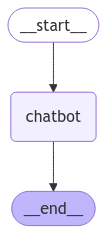

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [13]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hi langchain
Assistant: Hi there!  How can I help you today?  I'm a large language model, and I can assist with a wide range of tasks.  Let me know what you'd like to do.

User: q
Goodbye!


In [ ]:
%%capture --no-stderr
%pip install -U tavily-python langchain_community